In [3]:
# %load main.py
from jqdatasdk import *
from sklearn import *
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, explained_variance_score
from sklearn.preprocessing import  Normalizer

# 登录
auth('13074581737', 'trustno1')
# 获取原始资金流数据
raw = get_money_flow("600779.XSHG", start_date="2018-01-01", end_date="2019-02-14")
# 训练用X和Y
X = []
Y = []
# 测试用testX和testY（真实值）
testX = []
testY = []
# 储存整个数据集的原始Y值
orgY = []
# 储存实际日期
dateList = []

# 总数据组数(实际数据组数-1，因为抛弃了一组数据)
dataNum = raw.shape[0] - 1
# 训练数据组数
trainNum = (2 * dataNum) // 3
# 总测试数据组数
testNum = dataNum - trainNum

# 声明归一化对象
scaler = preprocessing.MinMaxScaler()
# raw.to_csv("data.csv")
# 处理原数数据X，丢弃最后一个X
for i in range(0, dataNum):
    roll = raw[i:i + 1]
    dateList.append(str(roll['date'].values[0])[:10])
    dataX = roll.drop(
        ["date", "sec_code", "change_pct", "net_amount_main", "net_pct_main", "net_amount_xl", "net_amount_l",
         "net_amount_m", "net_amount_s"], axis=1)
    if i < trainNum:
        X.append(dataX.values.tolist()[0])
    else:
        testX.append(dataX.values.tolist()[0])
# 处理原始数据Y，相对于X后错一天，意味着丢弃最后一个X和第0个Y
for i in range(1, dataNum + 1):
    roll = raw[i:i + 1]
    dataY = roll.loc[:, ["change_pct"]]
    if i < trainNum + 1:
        Y.append(dataY.values.tolist()[0])
    else:
        testY.append(dataY.values.tolist()[0])
    orgY.append(dataY.values.tolist()[0])
# 归一化
'''缩放至[0,1]'''
'''
X= Normalizer().fit(X).transform(X)
# Y= Normalizer().fit(Y).transform(Y)
testX= Normalizer().fit(testX).transform(testX)
# testY= Normalizer().fit(testY).transform(testY)
# orgY= Normalizer().fit(orgY).transform(orgY)
'''

X = scaler.fit_transform(X)
testX = scaler.transform(testX)
Y = scaler.fit_transform(Y)
testY = scaler.transform(testY)
orgY = scaler.transform(orgY)

# 数据输出
print("X:")
print(X)
print("Y:")
print(Y)
print("testX:")
print(testX)
print("testY")
print(testY)
# 参数设置
C = 100000
# 模型训练
clf = svm.SVR(kernel='rbf', gamma='auto',C=C)
# clf = GridSearchCV(svm.SVR(kernel="rbf"), param_grid={"C": np.logspace(-5, 5, 2), "gamma": np.logspace(-5, 5, 2)})
clf.fit(X, Y)
# 进行预测
result = clf.predict(testX)

# 结果输出
print("result:")
print(result)
'''
realY = []
for i in testY:
    realY.append(i[0])
'''
# 结果评分并输出
score = explained_variance_score(result,testY,multioutput="raw_values")
print(score)

# 绘图
plt.figure(figsize=(2 * 19.2, 2 * 10.8))
# plt.plot(range(0+trainNum,testY.shape[0]+trainNum),testY,marker=".",linewidth=3,linestyle="-",color="blue")
plt.plot(range(0, dataNum), orgY, marker=".", linewidth=1, linestyle="-", color="blue")
plt.plot(range(trainNum, dataNum), result, marker="x", linewidth=1, linestyle="--", color="orange")
plt.xticks(range(0, dataNum), dateList, rotation=45)
plt.grid(True)
# plt.title("params=" + str(clf.best_params_) + "    Score=" + str(score))
plt.title("params=" + str(C) + "    Score=" + str(score))
print(clf.gamma)
plt.legend(["Real", "Predict"], loc="upper right")
plt.show()


提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改


TTransportException: TTransportException(type=1, message="Could not connect to ('39.107.190.114', 7000)")

x =
 [[0.1127388 ]
 [0.12131038]
 [0.36135283]
 [0.42621635]
 [0.5227758 ]
 [0.70964656]
 [0.77355779]
 [0.86011972]
 [1.26229537]
 [1.58733367]
 [1.89257011]
 [2.1570474 ]
 [2.18226463]
 [2.30064911]
 [2.48797164]
 [2.5419288 ]
 [2.62219172]
 [2.62552327]
 [2.73690199]
 [2.76887617]
 [3.13108993]
 [3.17336952]
 [3.2692991 ]
 [3.29288102]
 [3.40826737]
 [3.41060369]
 [3.61658026]
 [3.67257434]
 [3.70160398]
 [3.70581298]
 [3.83952613]
 [3.87536468]
 [4.00060029]
 [4.02382722]
 [4.09092179]
 [4.18578718]
 [4.2911362 ]
 [4.64540214]
 [4.66894051]
 [4.68317506]
 [4.75035023]
 [4.79495139]
 [4.99571907]
 [5.22007289]
 [5.350638  ]
 [5.55357983]
 [5.66248847]
 [5.6680135 ]
 [5.78197656]
 [5.87171005]]
y =
 [ 0.05437325  0.43710367  0.65611482  0.78304981  0.87329469  1.38088042
  1.23598022  1.49456731  1.81603293  2.03841677  1.84627139  1.54797796
  1.63479377  1.53337832  1.22278185  1.15897721  0.92928812  0.95065638
  0.72022281  0.69233817 -0.06030957 -0.23617129 -0.23697659 -0.341601

E:\aconda\aconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fit OK.


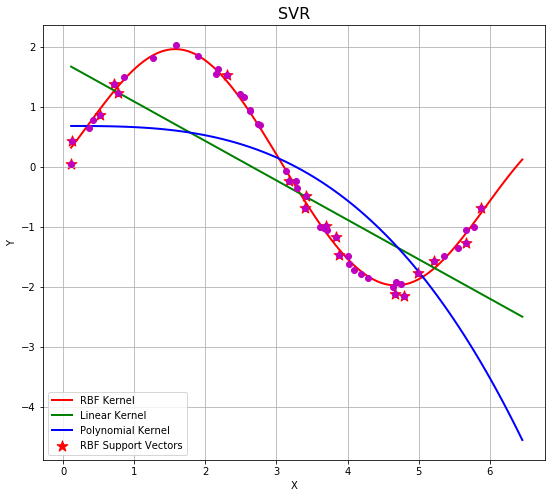

In [14]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt


if __name__ == "__main__":
    N = 50
    np.random.seed(0)
    x = np.sort(np.random.uniform(0, 6, N), axis=0)
    y = 2*np.sin(x) + 0.1*np.random.randn(N)
    x = x.reshape(-1, 1)
    print( 'x =\n', x)
    print ('y =\n', y)

    print( 'SVR - RBF')
    svr_rbf = svm.SVR(kernel='rbf', gamma=0.2, C=100)
    svr_rbf.fit(x, y)
    print ('SVR - Linear')
    svr_linear = svm.SVR(kernel='linear', C=100)
    svr_linear.fit(x, y)
    print( 'SVR - Polynomial')
    svr_poly = svm.SVR(kernel='poly', degree=3, C=100)
    svr_poly.fit(x, y)
    print( 'Fit OK.')

    # 思考：系数1.1改成1.5
    x_test = np.linspace(x.min(), 1.1*x.max(), 100).reshape(-1, 1)
    y_rbf = svr_rbf.predict(x_test)
    y_linear = svr_linear.predict(x_test)
    y_poly = svr_poly.predict(x_test)

    plt.figure(figsize=(9, 8), facecolor='w')
    plt.plot(x_test, y_rbf, 'r-', linewidth=2, label='RBF Kernel')
    plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear Kernel')
    plt.plot(x_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel')
    plt.plot(x, y, 'mo', markersize=6)
    plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=130, c='r', marker='*', label='RBF Support Vectors')
    plt.legend(loc='lower left')
    plt.title('SVR', fontsize=16)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()


SVR - RBF


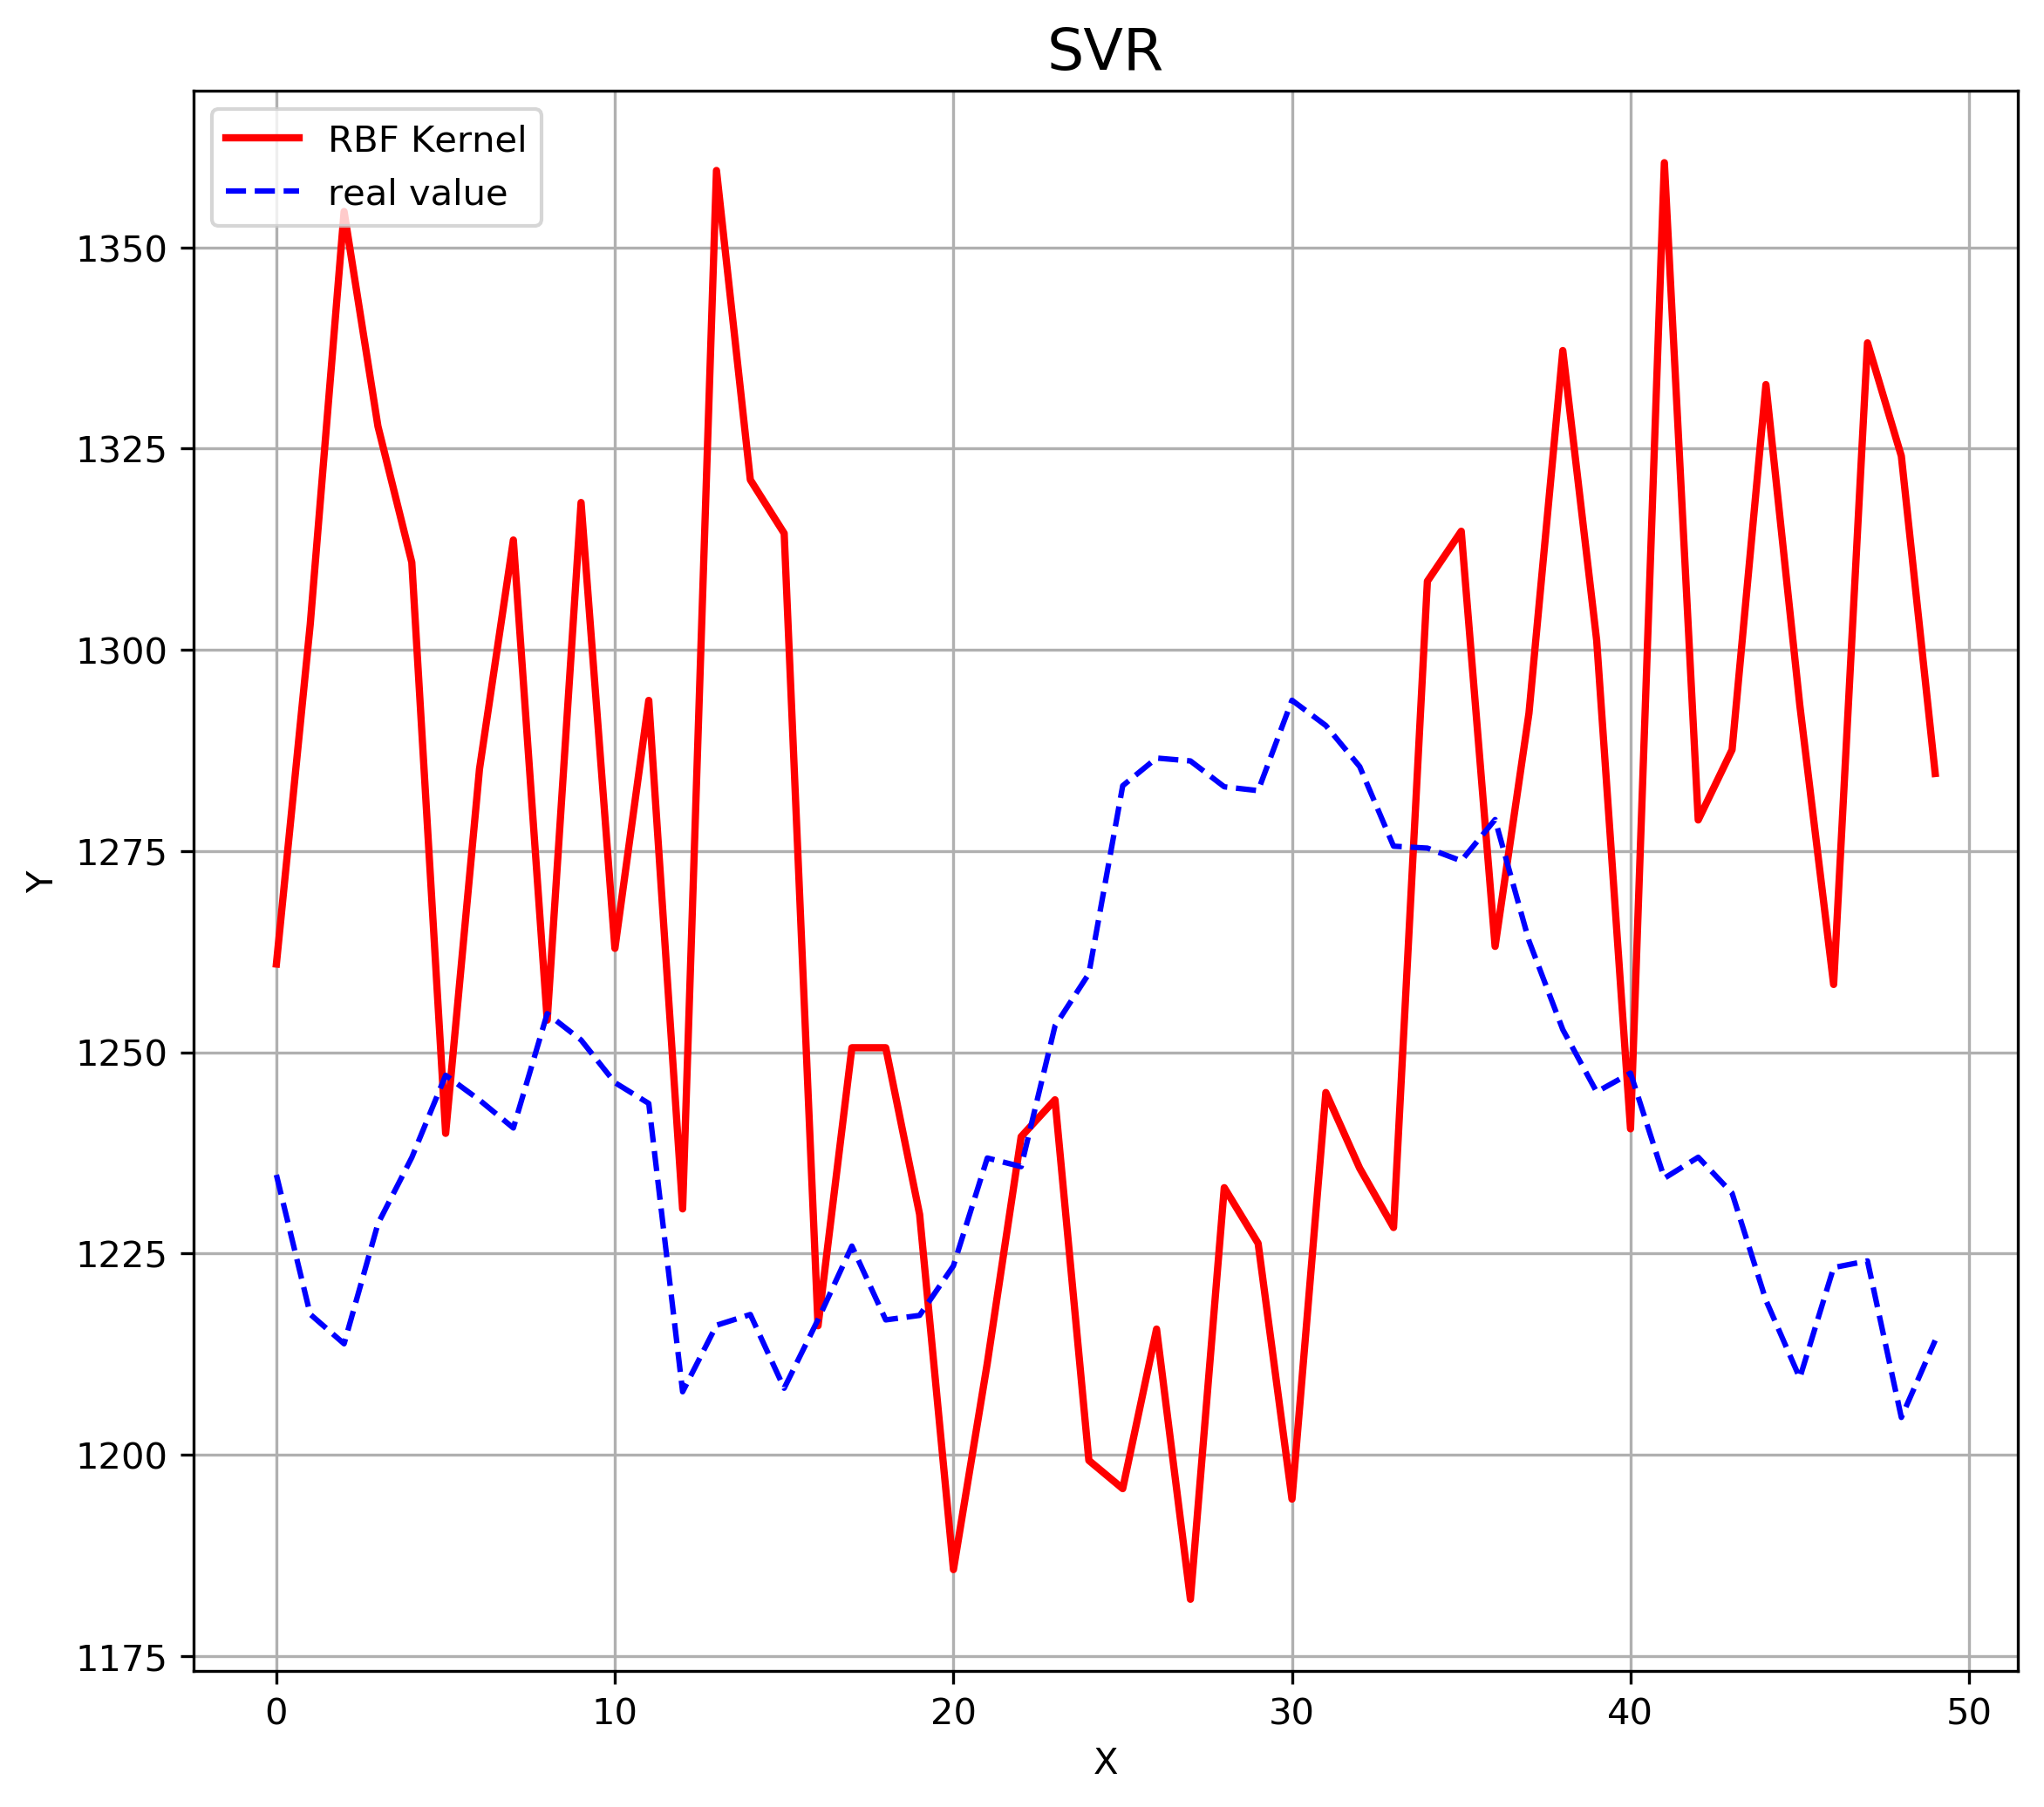

SVR - RBF


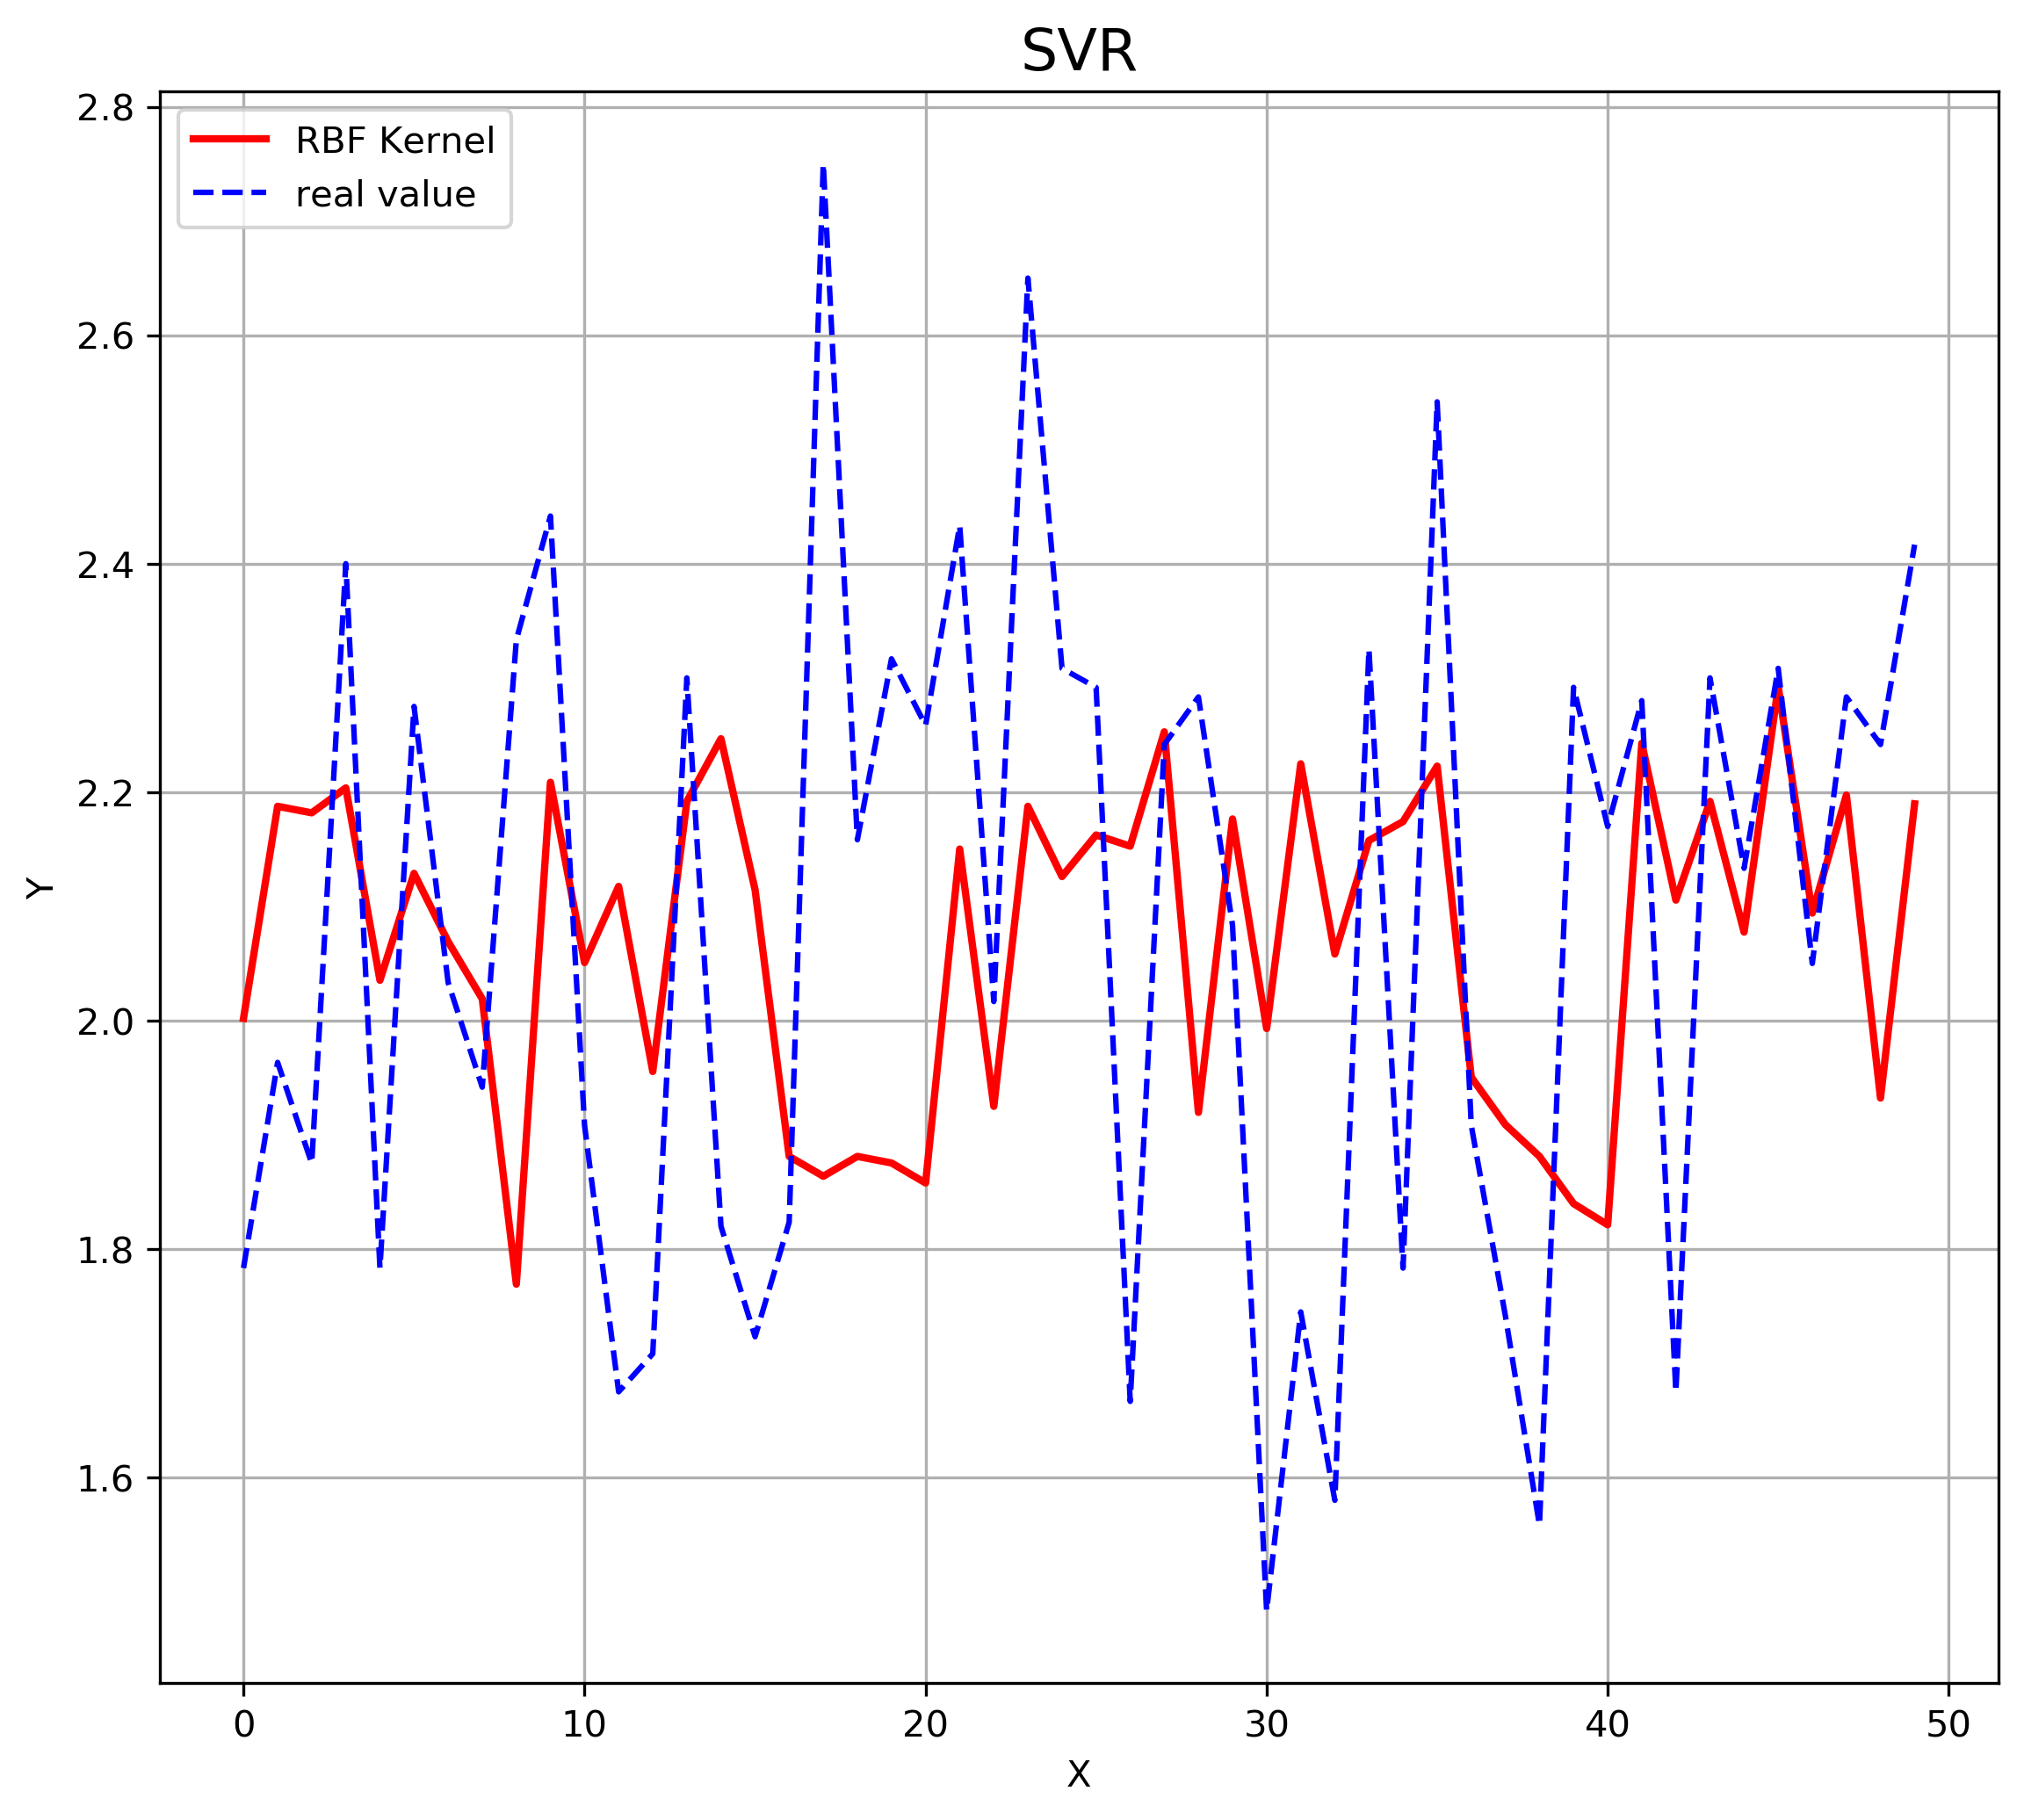

SVR - RBF


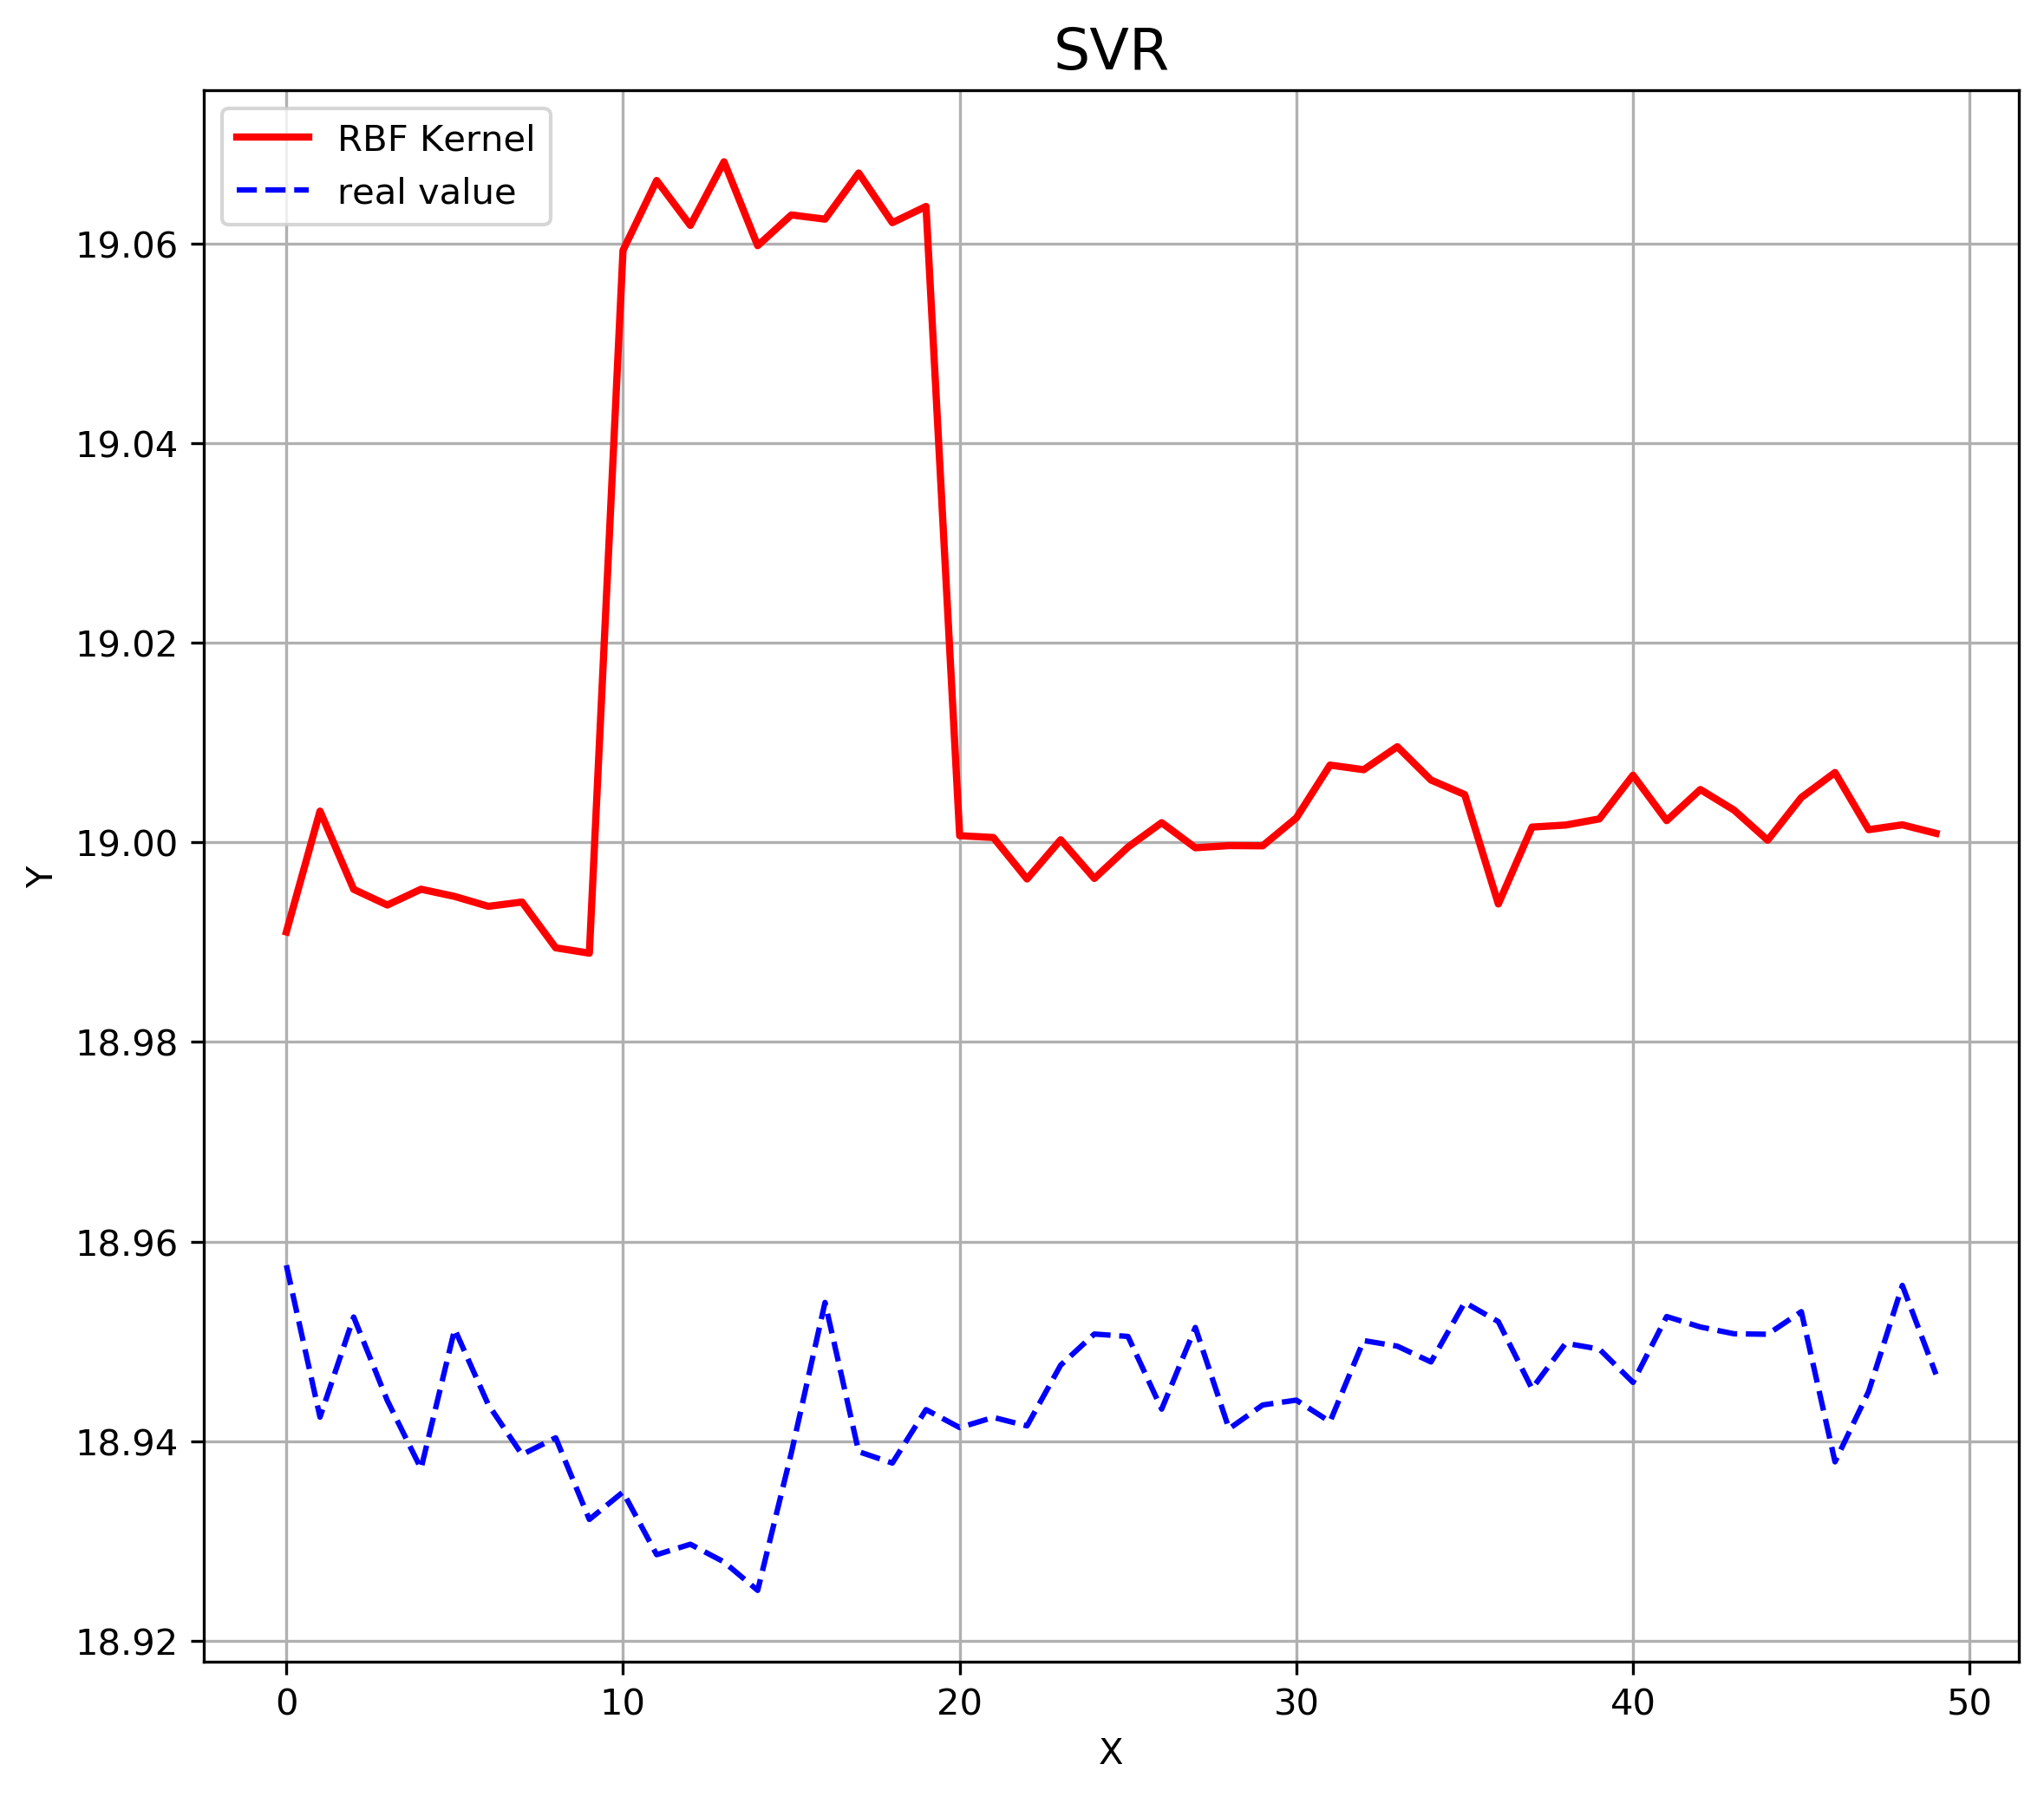

SVR - RBF


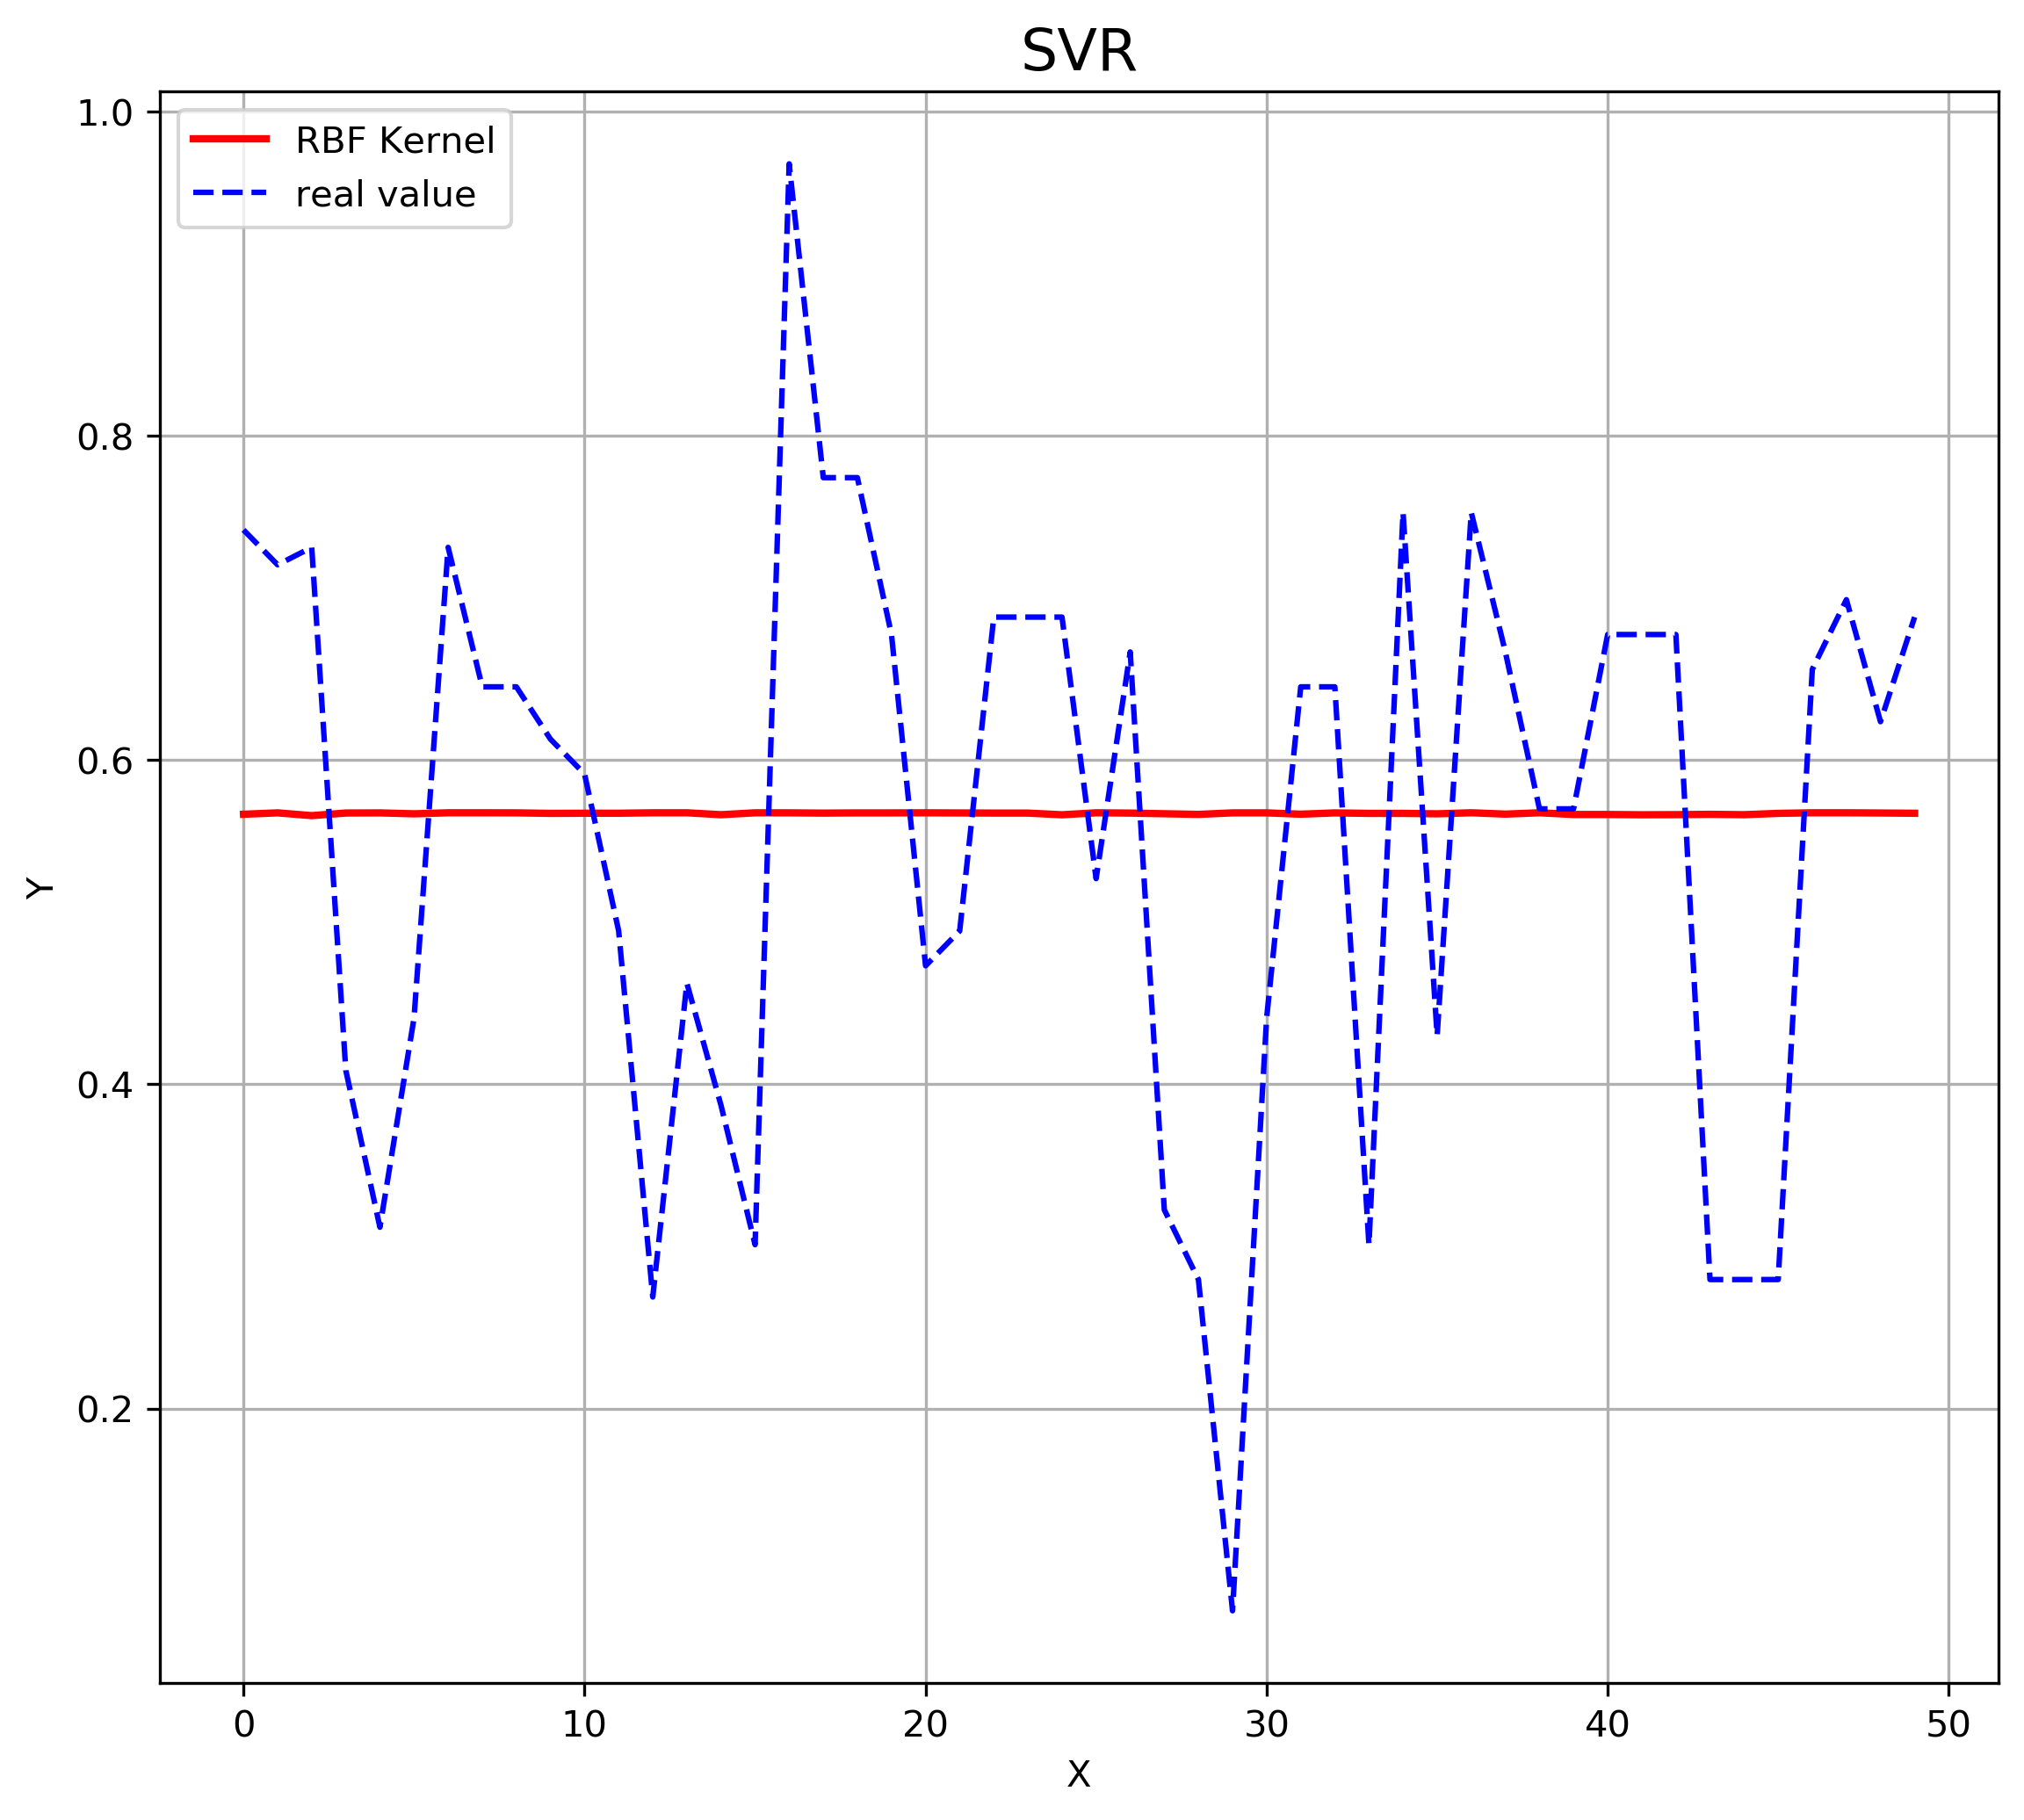

In [18]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":
    a0=pd.read_excel(r'C:\Users\stu\Desktop\RDATA.xlsx').values
    m,n=a0.shape
    yuce=[]
    for i in range(n):
        yu=[]
        x=a0[:,i][1700:1900]
        y=a0[:,i][1750:1950]
        x = x.reshape(-1, 1)
        print( 'SVR - RBF')
        svr_rbf = svm.SVR(kernel='rbf', gamma=0.2, C=100)
        svr_rbf.fit(x, y)
        x_test =a0[:,i][1750:1950]
        x_test = x_test.reshape(-1, 1)
        y_rbf = svr_rbf.predict(x_test)
        yuce.append(y_rbf)
        y2=a0[:,i][1800:2000]
        plt.figure(figsize=(9, 8), facecolor='w',dpi=300)
        plt.plot(y_rbf[-50:], 'r-', linewidth=2, label='RBF Kernel')
        plt.plot(y2[-50:], 'b--', markersize=6,label='real value')
        #plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=130, c='r', marker='*', label='RBF Support Vectors')
        plt.legend(loc='upper left')
        plt.title('SVR', fontsize=16)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()


In [1]:
yuce[0]

NameError: name 'yuce' is not defined

In [24]:
zs=np.array(a0[:,3])[1950:2000]
yuc=yuce[3]
error = []
#print(zs,yuce)

for i in range(len(zs)):
    error.append(zs[i] -yuc[i])
#print("Errors: ", error)
#print(error)
squaredError = []
absError = []
for val in error:    
    squaredError.append(val * val)#target-prediction之差平方     
    absError.append(abs(val))#误差绝对值  
    #print("Square Error: ", squaredError)
    #print("Absolute Value of Error: ", absError)    
print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE    
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE

MSE =  0.033469484498064105
RMSE =  0.18294667118607025
MAE =  0.15437902822591312


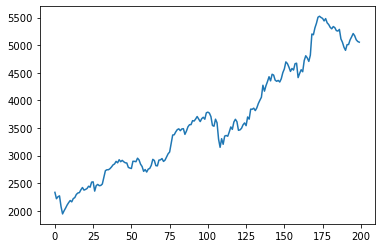

In [29]:
y4=a0[:,2][1750:1950]
plt.plot(y4)

In [20]:
import xlsxwriter   #导入模块
workbook = xlsxwriter.Workbook('SVM.xlsx')     #新建excel表
worksheet= workbook.add_worksheet('sheet1')
headings = ['stock','cpu1','goods','thyroid']   
worksheet.write_row('A1',headings)
worksheet.write_column('A2',np.array(yuce)[0][-50:])
worksheet.write_column('B2',np.array(yuce)[1][-50:])
worksheet.write_column('C2',np.array(yuce)[2][-50:]) 
worksheet.write_column('D2',np.array(yuce)[3][-50:])
workbook.close() 

In [16]:
import pandas as pd
a0=pd.read_excel(r'C:\Users\stu\Desktop\RDATA.xlsx').values
a1=pd.read_excel(r'C:\Users\stu\Desktop\REMDLSTM.xlsx').values
zs=a0[:,3][-50:]
yuce=a1[:,3]
error = []
for i in range(len(zs)):
    error.append(zs[i] -yuce[i])
#print("Errors: ", error)
print(error)
squaredError = []
absError = []
for val in error:    
    squaredError.append(val * val)#target-prediction之差平方     
    absError.append(abs(val))#误差绝对值  
   # print("Square Error: ", squaredError) 
print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE    
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE

[0.02113399808006111, 0.046905559673201314, 0.09648805849251108, -0.012449952092067174, -0.12316609955860902, -0.09614823224872088, 0.026894442780231675, -0.0005347792555885356, -0.015137299583695807, -0.032325871998777345, -0.0633483270637738, -0.07540879412113505, -0.2228082680789748, 0.03686122567941236, 0.023074628379146978, -0.1473207164124793, 0.16877427015818136, -0.055641017279559724, 0.04715064348693132, 0.10530251489452624, -0.037085220048376, -0.04557040302789567, 0.007526900107451828, 0.009959293452648788, -0.02632369555943692, -0.1282503131141013, -0.004502130803394899, -0.15302934141224545, -0.11472143961287162, -0.22308507682626308, -0.026390986884256895, 0.15299818164820678, 0.19399346679404428, -0.08232601479242224, 0.14492305773579262, -0.15241973701755995, 0.006729260171904339, -0.10505831546672495, -0.13788400976272885, -0.03067565751969159, 0.13498359729802134, 0.42474869314069713, 0.6939941005656285, 0.628397278021972, 0.8528180494260558, 1.083547774569769, 1.4711

In [10]:
zs

array([1234.78, 1217.46, 1213.79, 1228.71, 1236.93, 1247.15, 1244.07,
       1240.6 , 1254.81, 1251.53, 1246.24, 1243.65, 1207.83, 1216.09,
       1217.43, 1208.27, 1216.79, 1225.93, 1216.76, 1217.32, 1223.48,
       1236.87, 1235.8 , 1253.28, 1259.77, 1283.12, 1286.56, 1286.2 ,
       1282.99, 1282.51, 1293.74, 1290.6 , 1285.5 , 1275.61, 1275.37,
       1273.79, 1278.92, 1263.85, 1252.82, 1245.08, 1247.42, 1234.36,
       1236.97, 1232.51, 1219.2 , 1209.54, 1223.26, 1224.09, 1204.64,
       1214.21])

In [11]:
yuce

array([1237.96816987, 1229.56644667, 1220.56845632, 1219.16528368,
       1230.82080357, 1241.63596163, 1256.35706259, 1262.52722632,
       1257.4573525 , 1252.14461539, 1242.96042024, 1234.98108946,
       1229.35798248, 1213.78936968, 1218.5234721 , 1217.06682862,
       1222.89818129, 1220.93721502, 1223.95113295, 1221.1552108 ,
       1224.36851232, 1230.83437104, 1238.54181025, 1244.22688814,
       1261.98054859, 1276.0801242 , 1287.7381029 , 1289.55390931,
       1292.21996115, 1287.4955091 , 1285.87797974, 1289.52974254,
       1291.79434047, 1294.67767771, 1290.41926799, 1287.05202123,
       1282.59050973, 1280.74979627, 1272.66087113, 1268.07740853,
       1260.81526888, 1259.91146343, 1253.98304468, 1252.79233009,
       1248.87109486, 1243.0111544 , 1236.30525684, 1237.93507453,
       1240.1938857 , 1240.73555489])